<a href="https://colab.research.google.com/github/RickvanRavestein/MDD-Individual-Assignment/blob/main/Nike_Shoes_Sales_Analysis_RvR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Individiual Project Rick van Ravestein: Nike Shoes Sales Python Analysis

In [1]:
# Importing the dataset:

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving nike_shoes_sales.csv to nike_shoes_sales.csv


In [2]:
# Naming the dataset df and having a first look at the data:

df = pd.read_csv('nike_shoes_sales.csv')

df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


Data Preparation

In [3]:
# Checking for missing data in the entire DataFrame
missing_data = df.isna().sum()

# Displaying the count of missing values for each column
print(missing_data)


product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64


In [4]:
# Drop observations with missing values
df_cleaned = df.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

# Now, df_cleaned will be a new DataFrame where observations with missing values have been removed

Shape of the cleaned DataFrame: (569, 10)


In [5]:
# Dropping the 'images' column from the DataFrame since this variable will not be used for analysis
df_cleaned = df.drop(columns=['images'])

# Displaying the updated DataFrame
print(df_cleaned.head())

                     product_name  product_id  listing_price  sale_price  \
0  Nike Air Force 1 '07 Essential  CJ1646-600              0        7495   
1            Nike Air Force 1 '07  CT4328-101              0        7495   
2    Nike Air Force 1 Sage Low LX  CI3482-200              0        9995   
3             Nike Air Max Dia SE  CD0479-200              0        9995   
4             Nike Air Max Verona  CZ6156-101              0        9995   

   discount brand                                        description  rating  \
0         0  Nike  Let your shoe game shimmer in the Nike Air For...     0.0   
1         0  Nike  The legend lives on in the Nike Air Force 1 '0...     0.0   
2         0  Nike  Taking both height and craft to new levels, th...     0.0   
3         0  Nike  Designed for a woman's foot, the Nike Air Max ...     0.0   
4         0  Nike  Pass on the good vibes in the Nike Air Max Ver...     0.0   

   reviews  
0        0  
1        0  
2        0  
3        0

In [6]:
# Identifying and removing outliers using IQR

# Calculating the IQR for each numeric column
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-6-6b758ab16a8e>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_cleaned.quantile(0.25)
<ipython-input-6-6b758ab16a8e>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_cleaned.quantile(0.75)


In [7]:
# Identifying outliers based on the IQR
outliers = ((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)

# Displaying the number of outliers
print("Number of outliers:", outliers.sum())


Number of outliers: 107


<ipython-input-7-41504d919031>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)


In [8]:
# Removing outliers
df_no_outliers = df_cleaned[~outliers]

# Displaying the shape of the DataFrame after removing outliers
print("Shape of the DataFrame after removing outliers:", df_no_outliers.shape)


Shape of the DataFrame after removing outliers: (536, 9)


Analysis

Most Popular Nike Shoes Among Consumers

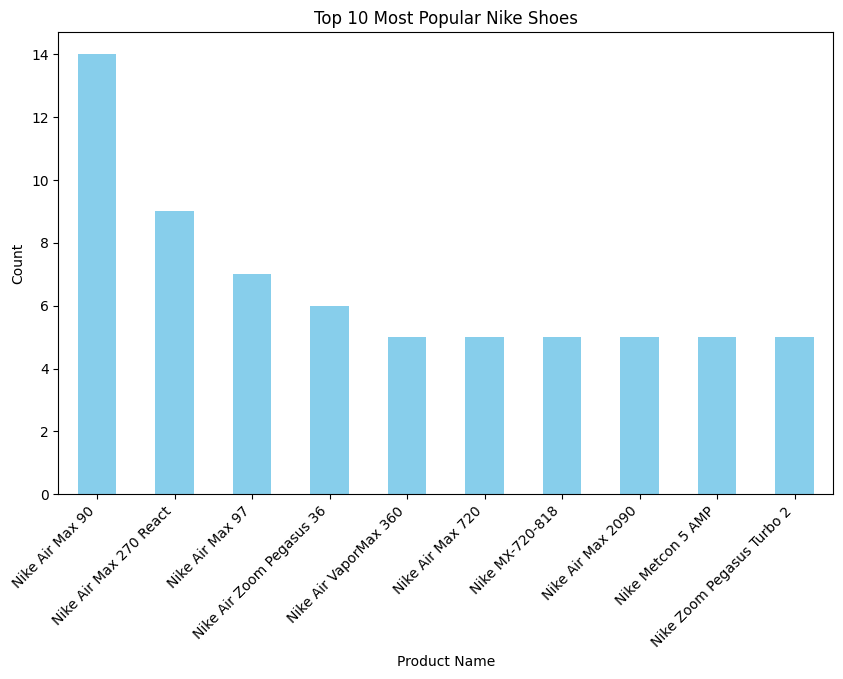

In [9]:
import matplotlib.pyplot as plt

# Getting the top 10 product names
top_product_names = df['product_name'].value_counts().nlargest(10)

# Plotting a bar plot for the top 10 product names
plt.figure(figsize=(10, 6))
top_product_names.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Nike Shoes')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()


Features and characteristics that customers value most in a shoe

In [10]:
pip install spacy

In [11]:
!python -m spacy download en_core_web_sm

2023-12-18 22:16:29.074052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 22:16:29.074142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 22:16:29.079047: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 22:16:29.096755: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 22:16:31.545077: W tensorflow/compiler/tf2

In [12]:
import spacy
from collections import Counter

# Loading spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Functioning to extract and analyze key phrases from text
def analyze_description(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extracting key phrases (noun chunks) from the processed text
    key_phrases = [chunk.text for chunk in doc.noun_chunks]

    return key_phrases

# Applying the function to the 'description' column
descriptions = df['description'].dropna()  # Removing rows with missing descriptions
all_key_phrases = [phrase for desc in descriptions for phrase in analyze_description(desc)]

# Getting the most common key phrases
top_key_phrases = Counter(all_key_phrases).most_common(10)

# Displaying the top key phrases and their frequencies
print("Top Key Phrases:")
for phrase, frequency in top_key_phrases:
    print(f"{phrase}: {frequency}")


Top Key Phrases:
you: 225
that: 219
it: 116
your foot: 77
It: 59
comfort: 50
traction: 35
style: 33
the Nike Air Max: 30
the court: 30


In [13]:
pip install wordcloud matplotlib

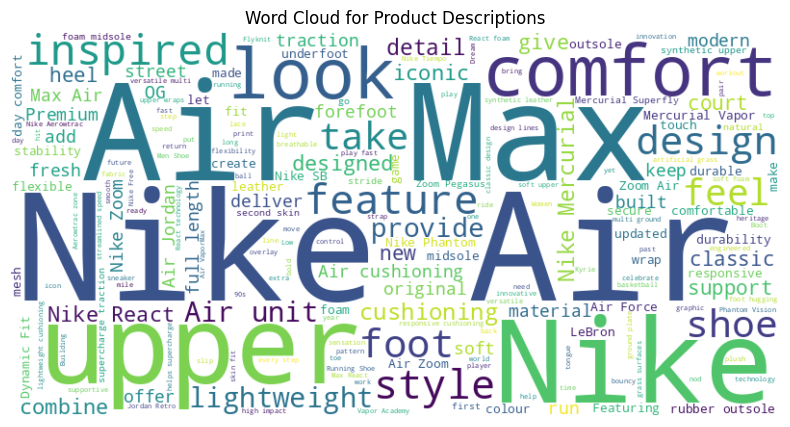

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all descriptions into a single string
all_descriptions = ' '.join(df['description'].dropna())

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions')
plt.show()

Customer ratings on Nike shoes

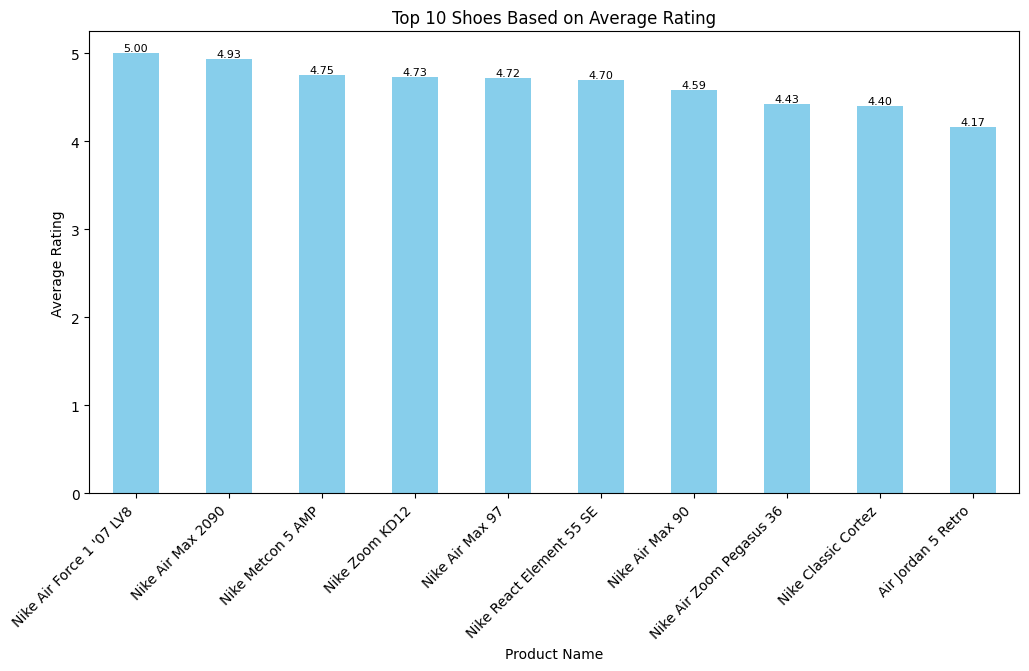

In [15]:
import matplotlib.pyplot as plt

# Step 1: Dropping rows where 'rating' is equal to '0.0'
df_filtered = df[df['rating'] != 0.0]

# Step 2: Grouping by 'product_name' and filtering out products with less than three ratings
product_ratings_counts = df_filtered['product_name'].value_counts()
valid_products = product_ratings_counts[product_ratings_counts >= 3].index
df_filtered = df_filtered[df_filtered['product_name'].isin(valid_products)]

# Step 3: Grouping by 'product_name' and calculating average rating
average_ratings = df_filtered.groupby('product_name')['rating'].mean()

# Step 4: Getting the top 10 products based on average rating
top_10_products = average_ratings.nlargest(10)

# Step 5: Visualizing with a bar chart
plt.figure(figsize=(12, 6))
bar_plot = top_10_products.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 Shoes Based on Average Rating')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Annotating the bars with exact average values
for idx, value in enumerate(top_10_products.sort_values(ascending=False)):
    bar_plot.text(idx, value, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()


Relationship between ratings and sale price

In [16]:
import pandas as pd
import statsmodels.api as sm

# Dropping rows where 'rating' is equal to '0.0'
df_filtered = df[df['rating'] != 0.0]

# Preparing data for regression
X = df_filtered['sale_price']
y = df_filtered['rating']

# Adding a constant term to the independent variable
X = sm.add_constant(X)

# Creating and fitting the OLS regression model
model = sm.OLS(y, X).fit()

# Displaying the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.448
Date:                Mon, 18 Dec 2023   Prob (F-statistic):             0.0640
Time:                        22:17:42   Log-Likelihood:                -500.11
No. Observations:                 414   AIC:                             1004.
Df Residuals:                     412   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0660      0.106     38.499      0.0

In [17]:
pip install prettytable

In [18]:
import pandas as pd
import statsmodels.api as sm
from prettytable import PrettyTable

# Dropping rows where 'rating' is equal to '0.0'
df_filtered = df[df['rating'] != 0.0]

# Preparing data for regression
X = df_filtered['sale_price']
y = df_filtered['rating']

# Adding a constant term to the independent variable
X = sm.add_constant(X)

# Creating and fitting the OLS regression model
model = sm.OLS(y, X).fit()

# Creatinh a table for displaying the regression results
table = PrettyTable()
table.field_names = ["", "Coefficient", "SE", "t-value", "p-value"]

# Adding rows for each variable
table.add_row(["Intercept", f"{model.params['const']:.3f}", f"{model.bse['const']:.3f}", f"{model.tvalues['const']:.3f}", f"{model.pvalues['const']:.3f}"])
table.add_row(["sale_price", f"{model.params['sale_price']:.3f}", f"{model.bse['sale_price']:.3f}", f"{model.tvalues['sale_price']:.3f}", f"{model.pvalues['sale_price']:.3f}"])

# Displaying the table
print(table)

+------------+-------------+-------+---------+---------+
|            | Coefficient |   SE  | t-value | p-value |
+------------+-------------+-------+---------+---------+
| Intercept  |    4.066    | 0.106 |  38.499 |  0.000  |
| sale_price |    0.000    | 0.000 |  1.857  |  0.064  |
+------------+-------------+-------+---------+---------+
